## PHÂN TÍCH VÀ TRỰC QUAN HÓA DỮ LIỆU

In [44]:
#read data
import pandas as pd

X = pd.read_csv('DATA\\X_data.csv')

In [45]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Height                          2111 non-null   float64
 2   Weight                          2111 non-null   float64
 3   FAVC                            2111 non-null   int64  
 4   FCVC                            2111 non-null   int64  
 5   NCP                             2111 non-null   int64  
 6   SCC                             2111 non-null   int64  
 7   SMOKE                           2111 non-null   int64  
 8   CH2O                            2111 non-null   int64  
 9   family_history_with_overweight  2111 non-null   int64  
 10  FAF                             2111 non-null   int64  
 11  TUE                             2111 non-null   int64  
 12  Gender_Male                     21

In [46]:
# Phân tích thống kê dữ liệu
print(X.describe())

               Age       Height       Weight         FAVC         FCVC  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     0.883941   457.986736   
std       6.345968     0.093305    26.191172     0.320371   295.226514   
min      14.000000     1.450000    39.000000     0.000000     0.000000   
25%      19.947192     1.630000    65.473343     1.000000   170.000000   
50%      22.777890     1.700499    83.000000     1.000000   421.000000   
75%      26.000000     1.768464   107.430682     1.000000   809.000000   
max      61.000000     1.980000   173.000000     1.000000   809.000000   

               NCP          SCC        SMOKE         CH2O  \
count  2111.000000  2111.000000  2111.000000  2111.000000   
mean    388.715775     0.045476     0.020843   601.051161   
std     179.959492     0.208395     0.142893   391.006783   
min       0.000000     0.000000     0.000000     0.000000   
25%     325.500000     0.000

In [47]:
# Chuẩn hóa dữ liệu 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(scaled_df.head())

        Age    Height    Weight      FAVC      FCVC       NCP       SCC  \
0 -0.522124 -0.875589 -0.862558 -2.759769 -0.975708  0.490695 -0.218272   
1 -0.522124 -1.947599 -1.168077 -2.759769  1.189244  0.490695  4.581439   
2 -0.206889  1.054029 -0.366090 -2.759769 -0.975708  0.490695 -0.218272   
3  0.423582  1.054029  0.015808 -2.759769  1.189244  0.490695 -0.218272   
4 -0.364507  0.839627  0.122740 -2.759769 -0.975708 -2.160530 -0.218272   

      SMOKE      CH2O  family_history_with_overweight  ...  CAEC_Frequently  \
0 -0.145900 -0.133152                        0.472291  ...        -0.359835   
1  6.853997  1.703568                        0.472291  ...        -0.359835   
2 -0.145900 -0.133152                        0.472291  ...        -0.359835   
3 -0.145900 -0.133152                       -2.117337  ...        -0.359835   
4 -0.145900 -0.133152                       -2.117337  ...        -0.359835   

   CAEC_Sometimes   CAEC_no  CALC_Frequently  CALC_Sometimes   CALC_no  \


Phương sai được giải thích bởi mỗi thành phần chính:
[1.37857345e-01 9.20705618e-02 8.19397447e-02 7.52435634e-02
 6.10856652e-02 5.48579334e-02 5.32509379e-02 4.96328103e-02
 4.49540361e-02 4.33954942e-02 4.05843547e-02 3.84351076e-02
 3.57332112e-02 3.44118250e-02 3.35639416e-02 2.93007136e-02
 2.61202972e-02 2.55571189e-02 1.66824865e-02 1.25997916e-02
 8.81417561e-03 3.86600141e-03 4.28833063e-05]


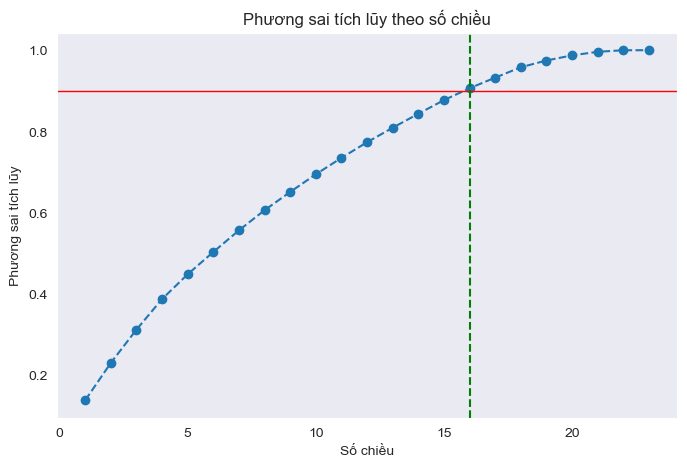

Số chiều tối ưu là 16 để giữ lại 90.0% phương sai


In [54]:
# Import thư viện
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Thực hiện PCA
pca = PCA(n_components=scaled_df.shape[1])  # Số thành phần tối đa bằng số chiều dữ liệu
principal_components = pca.fit_transform(scaled_df)

# Tính phương sai 
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Hiển thị kết quả
print("Phương sai được giải thích bởi mỗi thành phần chính:")
print(explained_variance_ratio)

# Biểu đồ phương sai tích lũy 
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-', label='90%', linewidth=1)
plt.axvline(x=np.argmax(cumulative_variance >= 0.90) + 1, color='g', linestyle='--')
plt.title('Phương sai tích lũy theo số chiều')
plt.xlabel('Số chiều')
plt.ylabel('Phương sai tích lũy')
plt.grid()
plt.savefig('Img\\Cumulative_Explained_Variance.png')
plt.show()

threshold = 0.90  # Mức độ phương sai cần giữ lại
optimal_components = np.argmax(cumulative_variance >= threshold) + 1  # +1 vì chỉ số bắt đầu từ 0
print(f"Số chiều tối ưu là {optimal_components} để giữ lại {threshold * 100}% phương sai")

In [48]:
# Trực quan hóa dữ liệu với PCA 2 chiều trong 16 chiều dữ liệu
pca = PCA(n_components=16)
principal_components = pca.fit_transform(scaled_df)

principal_df = pd.DataFrame(data=principal_components, columns=[f"PC{i}" for i in range(1, 17)])
print(principal_df.head())

# Biểu đồ phân phối dữ liệu sau khi giảm chiều